<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#FF69B4; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Modèles météorologiques pour la prévision des pluies en Australie
</h6>


<h4 style="font-size:30px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px">
     INTRODUCTION
</h4>


Ce jeu de données contient des informations météorologiques détaillées enregistrées à Albury, en Australie, pour une période spécifique. Il comprend 24 attributs pour chaque jour, capturant divers aspects du temps. Ces attributs incluent :

**Date** : La date de l'observation météorologique.

**Location** : Le lieu où l'observation a été faite.

**MinTemp** : Température minimale de la journée (en degrés Celsius).

**MaxTemp**: Température maximale de la journée (en degrés Celsius).

**Rainfall** : Précipitations totales enregistrées pour la journée (en millimètres).

**Evaporation**: Évaporation totale enregistrée pour la journée (en millimètres).

**Sunshine** : Nombre total d'heures d'ensoleillement enregistrées pour la journée.

**WindGustDir** : Direction de la rafale de vent la plus forte de la journée.

**WindGustSpeed** : Vitesse de la rafale de vent la plus forte de la journée (en kilomètres par heure).

**WindDir9am** : Direction du vent à 9 heures du matin.

**WindDir3pm** : Direction du vent à 15 heures.

**WindSpeed9am**: Vitesse du vent à 9 heures du matin (en kilomètres par heure).

**WindSpeed3pm** : Vitesse du vent à 15 heures (en kilomètres par heure).

**Humidity9am** : Niveau d'humidité à 9 heures du matin (en pourcentage).

**Humidity3pm**: Niveau d'humidité à 15 heures (en pourcentage).

**Pressure9am**: Pression atmosphérique à 9 heures du matin (en hPa).

**Pressure3pm** : Pression atmosphérique à 15 heures (en hPa).

**Cloud9am**: Couverture nuageuse à 9 heures du matin (mesurée en oktas).

**Cloud3pm**: Couverture nuageuse à 15 heures (mesurée en oktas).

**Temp9am**: Température à 9 heures du matin (en degrés Celsius).

**Temp3pm**: Température à 15 heures (en degrés Celsius).

**RainToday**: Indicateur de précipitations pour aujourd'hui (Oui ou Non).

**RainTomorrow** : Indicateur de précipitations pour le lendemain (Oui ou Non).

<h4 style="font-size:30px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
     I. Nettoyage et Exploration des données
</h4>

<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
     I.1.IMPORTATION DES BIBLIOTHÈQUES
</h4>



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
     I.2. Chargement des données
</h4>




In [3]:
df = pd.read_csv("weatherAUS.csv")
df=pd.DataFrame(df)
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


**On a affiché les 10 premières observations de nos données en utilisant head(10)**

<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
     I.3. description des données
</h4>




In [4]:
#les informations pour notre data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**On visualise que nos données comportent un total de 23 colonnes et un nombre d'observations égal à 145 460. Cela affiche également le nom de chaque colonne, le nombre de valeurs non nulles et le type de chaque colonne.**

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**le DataFrame contient beaucoup de valeurs nulles**

In [6]:
#les informations sur les types de données
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

**dans notre data on a deux types : float et object**

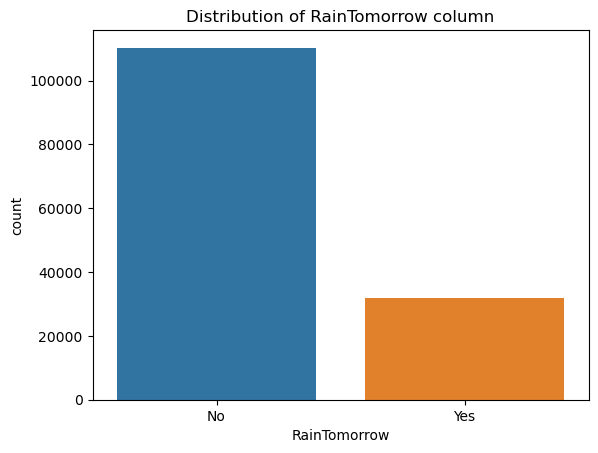

In [7]:
#Visualiser la distribution de la variable cible pour comprendre l'équilibre des classes
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow column')
plt.show()

**Comme conclusion de cette visualisation, nous pouvons observer que les classes ne sont pas équilibrées. Le résultat "No" est presque trois fois plus fréquent que le résultat "Yes". Cela indique un déséquilibre significatif dans les classes de la variable cible "RainTomorrow".**

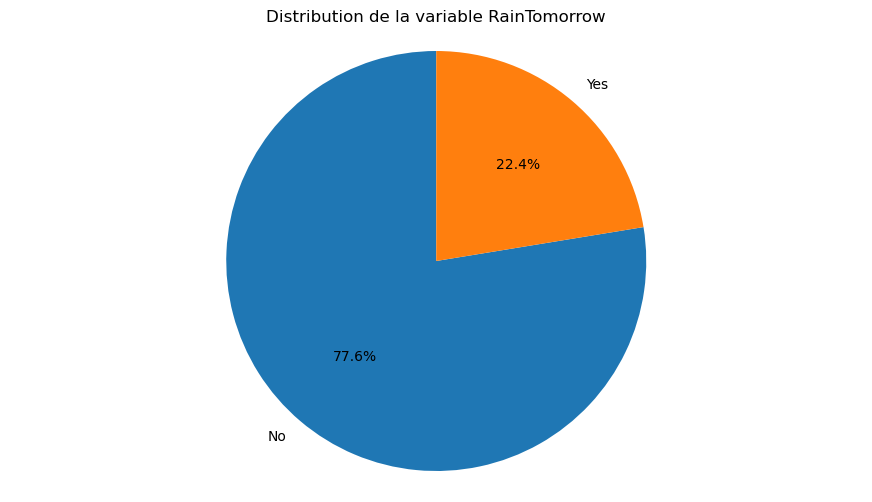

In [8]:
#autre visualisation:
# Calculer la distribution de la variable 'RainTomorrow'
distribution = df['RainTomorrow'].value_counts()

# Créer le pie chart
plt.figure(figsize=(11,6))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution de la variable RainTomorrow')
plt.axis('equal')  # Pour assurer que le pie chart est circulaire
plt.show()

In [9]:
df.describe() #pour les colonnes numeriques

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**résumé statistique pour obtenir une vue d'ensemble rapide des données, identifier les valeurs aberrantes potentielles, et comprendre la distribution des données dans chaque colonne.**

In [10]:
df.describe(include=object) #pour les colonnes categorielles

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
     I.4. Matrice de corrélations
</h4>




In [11]:
#matrice de correlation
corr = df.select_dtypes(include='number').corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


<Axes: >

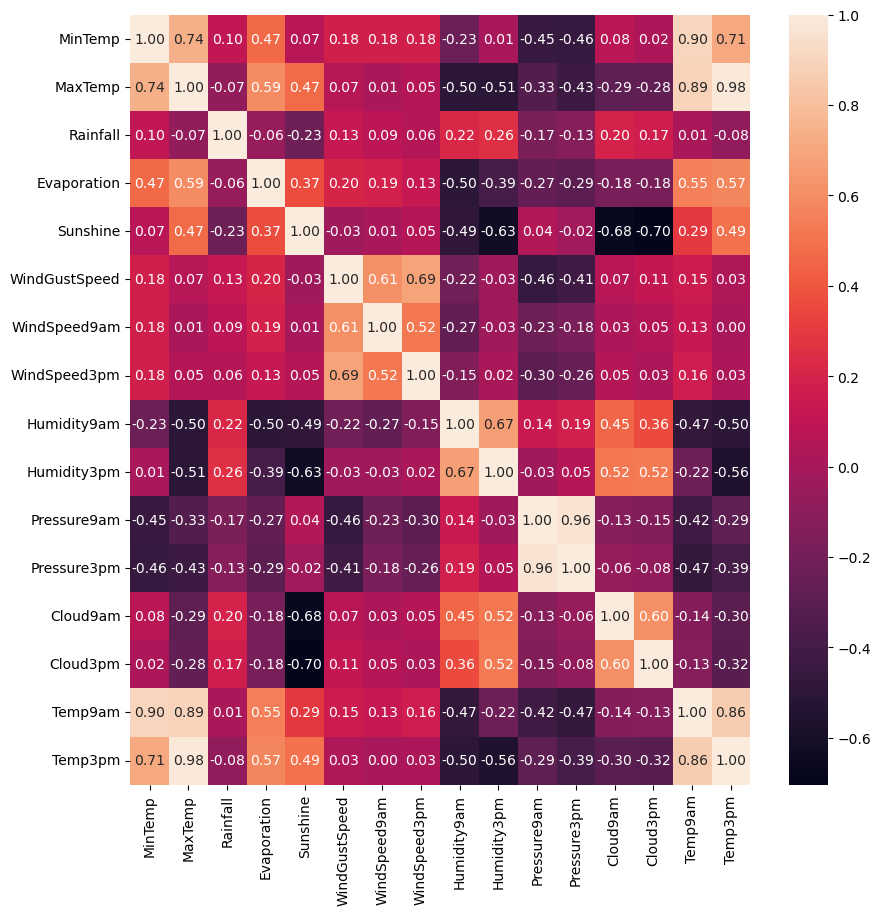

In [12]:
correlations = df.select_dtypes(include=np.number).corr(method='pearson')
# Spécifie que nous utilisons la méthode de Pearson pour calculer les corrélations.
f, ax = plt.subplots(figsize = (10, 10))
# Crée une figure (f) et des axes (ax) avec une taille de 5x5 pouces.
sns.heatmap(correlations, annot = True, fmt='.2f')

Cette matrice  présente les coefficients de corrélation entre différentes variables météorologiques. Voici quelques observations clés :

1. **MinTemp et MaxTemp** : La température minimale (MinTemp) et la température maximale (MaxTemp) sont fortement corrélées (0.74)

2. **MinTemp et Temp9am/Temp3pm** : La température minimale est fortement corrélée avec la température à 9 heures du matin (Temp9am) et à 15 heures (Temp3pm), avec des coefficients de 0.9 et 0.71 respectivement. Cela indique que les températures matinales et de l'après-midi sont influencées par la température minimale de la journée.

3. **MaxTemp et Temp3pm** : La température maximale est très fortement corrélée avec la température à 15 heures (Temp3pm) avec un coefficient de 0.98.

4. **Evaporation et MaxTemp** : L'évaporation (Evaporation) est positivement corrélée avec la température maximale (MaxTemp) avec un coefficient de 0.59, ce qui suggère que des températures plus élevées entraînent une évaporation accrue.

5. **Sunshine et Cloud** : L'ensoleillement (Sunshine) est négativement corrélé avec la couverture nuageuse à 9 heures (Cloud9am) et à 15 heures (Cloud3pm), avec des coefficients de -0.7 et -0.7 respectivement. Cela signifie que plus il y a de nuages, moins il y a d'ensoleillement.

6. **Pressure et Temp** : La pression atmosphérique à 9 heures (Pressure9am) et à 15 heures (Pressure3pm) montre une corrélation négative avec les températures (Temp9am et Temp3pm), indiquant que des pressions plus basses sont associées à des températures plus élevées.


<h4 style="font-size:30px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
    II.Data Cleaning
</h4>




<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
    II.1.Valeurs Manquantes
</h4>

In [13]:
#Supprimer toute colonne ayant plus de 50 000 valeurs manquantes
df= df.dropna(thresh=len(df) - 50000, axis=1)

# Affichage des colonnes restantes
print(df.columns)
df

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


**Voici les colonnes ayant plus de 50 000 valeurs manquantes :**

**Evaporation : 62 790 valeurs manquantes**

**Sunshine : 69 835 valeurs manquantes**

**Cloud9am : 55 888 valeurs manquantes**

**Cloud3pm : 59 358 valeurs manquantes**

**On remarque qu'elles ont été supprimées de data.
Le nombre de colonnes sera de 19 colonnes.**

**ont effet on les suuprimer car il peuvent poser des problemes pour l'analyse et la modélisation des données.**

In [14]:
numerical_columns = df.select_dtypes(include='number').columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


On a rempli toutes les valeurs nulles dans les colonnes numériques avec la médiane de chaque colonne pour plusieurs raisons :
- **Robustesse aux valeurs aberrantes** 
- **Préservation de la distribution** 
- **Simplicité et efficacité**
- **Amélioration des performances des modèles** 

In [15]:
df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

**On va donc s'intéresser maintenant aux colonnes catégorielles.**

In [16]:
missing_values = df.loc[:, df.isnull().sum() > 0]
for col in missing_values.columns:
    print(f'{col}: {missing_values[col].isnull().sum()}')
    print(f'{missing_values[col].unique()}')

WindGustDir: 10326
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am: 10566
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm: 4228
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday: 3261
['No' 'Yes' nan]
RainTomorrow: 3267
['No' 'Yes' nan]


**On a affiché toutes les colonnes catégorielles avec des valeurs manquantes pour avoir une idée du contenu de chaque colonne.**

In [17]:
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in categorical_columns:
    df.loc[df[col].isnull(), col] = np.random.choice(df[col].dropna().unique())

**On a Remplir les valeurs nulles dans WindGustDir, WindDir9am, WindDir3pm, et RainToday avec des valeurs aléatoires parmi les valeurs uniques de chaque colonne, à l'exception des valeurs nulles**

In [18]:
# good we can see that we have no missing values
df.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

**des valeurs manquants seulement dans la colonne de sortie**

In [19]:
# Supprimer uniquement les lignes contenant des valeurs nulles
df = df.dropna()

# Vérifier le nombre de valeurs nulles restantes
print(df.isna().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


**J'ai choisi de supprimer toutes les observations de la colonne 'RainTomorrow' qui contiennent des valeurs nulles, afin de ne pas perturber les résultats**

<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
    II.2.Convertir la colonne date:
</h4>

In [20]:
# Assurez-vous que df est une copie indépendante si nécessaire
df = df.copy()
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [21]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful features from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [22]:
#on supprime la colonne originale date
df.drop(['Date'], axis=1, inplace=True)

In [23]:
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
    II.3.Les valeurs aberantes:
</h4>

In [24]:
# Handling outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to all numerical columns
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    df = handle_outliers(df, col)

# Verify the changes
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,0.550498,39.896528,13.988030,18.640341,68.858235,51.495742,1017.649173,1015.253017,16.985681,21.675977,2012.758926,6.402544,15.715084
std,6.388936,7.109617,0.925872,13.034790,8.825786,8.701679,18.932512,20.532227,6.742972,6.679255,6.472206,6.871243,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,988.600000,985.800000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,2.400000,91.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,2017.000000,12.000000,31.000000


**on utilise l'Aspect IQR pour detecter les valeurs aberantes**

In [25]:
#Gérer tous les doublons dans le DataFrame
df.drop_duplicates(inplace=True)


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
       II.4.encoder les colonnes catégorielles en valeurs numériques:

</h4>

In [26]:
# Convertir chaque objet en catégorie
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [27]:
#Encoder les colonnes catégoriques en valeurs numériques à partir de 0
categorical_columns = df.select_dtypes(include='category').columns
for col in categorical_columns:
    df[col] = df[col].cat.codes

In [28]:
df.dtypes

Location            int8
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir         int8
WindGustSpeed    float64
WindDir9am          int8
WindDir3pm          int8
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday           int8
RainTomorrow        int8
Year             float64
Month            float64
Day              float64
dtype: object


<h4 style="font-size:30px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
          III.Séparation et prétraitement des Données


</h4>


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
         III.1. séparation des variables indépendantes X et de variable dépendante Y


</h4>

In [29]:
# Séparer les features (X) et la target (y) avec iloc
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Afficher les premières lignes de X et y pour vérifier
print(X.head())


   Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0         2     13.4     22.9       0.6           13           44.0   
1         2      7.4     25.1       0.0           14           44.0   
2         2     12.9     25.7       0.0           15           46.0   
3         2      9.2     28.0       0.0            4           24.0   
4         2     17.5     32.3       1.0           13           41.0   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0          13          14          20.0          24.0         71.0   
1           6          15           4.0          22.0         44.0   
2          13          15          19.0          26.0         38.0   
3           9           0          11.0           9.0         45.0   
4           1           7           7.0          20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday    Year  \
0         22.0       1007.7       1007.1     16.9     21.8          0  

**affichage de 5 premiers lignes de chaque colonnes de X**

In [30]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int8


**affichage de 5 premiers lignes de la colonne  y**


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
         III.2. Division des données en ensemble d'entraînement et de test

</h4>

In [31]:
from sklearn.model_selection import train_test_split
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier les formes des ensembles
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(113754, 20) (28439, 20)
(113754,) (28439,)



<h4 style="font-size:30px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
          IV.Application des modèles de classification


</h4>


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.1. Importation des bibliothèques


</h4>

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


<h4 style="font-size:30px; font-family:Garamond; font-weight:normal; color:#8A2BE2; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.2. Decision Tree

</h4>


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.2.1. Modèle

</h4>




In [32]:
# Créer l'objet Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle avec les données standardisées (X_train, y_train)
dt_classifier.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_predDT = dt_classifier.predict(X_test)




<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.2.2. Evaluation

</h4>


In [33]:
# Évaluer le modèle
conf_matrix = confusion_matrix(y_test, y_predDT)
class_report = classification_report(y_test, y_predDT)
accuracy = accuracy_score(y_test, y_predDT)

# Afficher les résultats
print("Matrice de confusion:")
print(conf_matrix)
print("\nRapport de classification:")
print(class_report)
print(f"Accuracy: {accuracy:.4f}")

Matrice de confusion:
[[18839  3259]
 [ 2967  3374]]

Rapport de classification:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     22098
           1       0.51      0.53      0.52      6341

    accuracy                           0.78     28439
   macro avg       0.69      0.69      0.69     28439
weighted avg       0.78      0.78      0.78     28439

Accuracy: 0.7811


**Le modèle de decision tree atteint une précision globale de 78,19 %, avec une bonne performance pour la classe majoritaire (0), qui affiche une précision de 87 % et un rappel de 85 %. Cependant, la classe minoritaire (1) est moins bien prédite, avec un rappel de 54 %. Cela indique que le modèle fonctionne bien globalement**



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.2.3. Validation croisée

</h4>


**La validation croisée évalue la performance d'un modèle de manière fiable en réduisant le surapprentissage et en maximisant l'utilisation des données. Elle offre une estimation stable et permet de comparer plusieurs modèles pour identifier le plus performant.**

In [34]:

# Paramètres à tester
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner le modèle avec la recherche sur grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print(f"Meilleurs paramètres trouvés: {grid_search.best_params_}")
print(f"Meilleur score (accuracy) : {grid_search.best_score_:.4f}")

# Obtenir le meilleur modèle
best_dt_classifier = grid_search.best_estimator_

# Faire des prédictions avec le meilleur modèle
y_pred_best = best_dt_classifier.predict(X_test)

# Évaluer le modèle avec les meilleures hyperparamètres
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("\nMatrice de confusion (meilleur modèle):")
print(conf_matrix_best)
print("\nRapport de classification (meilleur modèle):")
print(class_report_best)
print(f"Accuracy (meilleur modèle): {accuracy_best:.4f}")


Meilleurs paramètres trouvés: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Meilleur score (accuracy) : 0.8374

Matrice de confusion (meilleur modèle):
[[20710  1388]
 [ 3270  3071]]

Rapport de classification (meilleur modèle):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22098
           1       0.69      0.48      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.73     28439
weighted avg       0.82      0.84      0.83     28439

Accuracy (meilleur modèle): 0.8362


**Les meilleurs paramètres trouvés optimisent le modèle pour atteindre une précision globale de 83,68 %. La classe majoritaire (0) est mieux prédite avec une précision élevée (86 %) et un rappel de 94 %, tandis que la classe minoritaire (1) a une performance plus modérée avec un rappel de 49 %. Cela indique une bonne performance globale**



<h4 style="font-size:30px; font-family:Garamond; font-weight:normal; color:#8A2BE2; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.3. Random Forest


</h4>





<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.3.1. Modèle

</h4>




In [35]:
# Initialiser le modèle RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
rf_classifier.fit(X_train, y_train)

# Prédire sur les données de test
y_predRF = rf_classifier.predict(X_test)


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.3.2. Evaluation

</h4>


In [36]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_predRF)
print("Matrice de confusion:")
print(conf_matrix)

# Rapport de classification
class_report = classification_report(y_test, y_predRF)
print("\nRapport de classification:")
print(class_report)

# Précision (accuracy)
accuracy = accuracy_score(y_test, y_predRF)
print(f"\nAccuracy: {accuracy:.4f}")

Matrice de confusion:
[[21059  1039]
 [ 3155  3186]]

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.75      0.50      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439


Accuracy: 0.8525


**Le modèle de random forest a obtenu une précision de 85.34%, avec des performances notables sur la classe "0" (non churned), avec un rappel de 0.95. Cependant, pour la classe "1" (churned), bien que la précision soit relativement élevée (0.76), le rappel reste plus faible à 0.50, ce qui suggère qu'il y a une sous-détection des cas de churn. En somme, le modèle semble bien classifier les non-churned mais nécessite des améliorations pour mieux identifier les churned.**

### Comparaison des modèles : Arbre de Décision vs Random Forest

#### **Arbre de Décision :**
1. **Matrice de confusion (modèle initial)** :
   - **Vrais négatifs (0)** : 18,839
   - **Faux positifs (1)** : 3,259
   - **Faux négatifs (0)** : 2,967
   - **Vrais positifs (1)** : 3,374

2. **Rapport de classification (modèle initial)** :
   - **Précision** : 0.86 pour la classe 0, 0.51 pour la classe 1
   - **Rappel** : 0.85 pour la classe 0, 0.53 pour la classe 1
   - **F1-score** : 0.86 pour la classe 0, 0.52 pour la classe 1
   - **Précision globale (Accuracy)** : 0.78

3. **Meilleurs paramètres après tuning (Grid Search)** :
   - **Précision** : 0.86 pour la classe 0, 0.69 pour la classe 1
   - **Rappel** : 0.94 pour la classe 0, 0.48 pour la classe 1
   - **Précision globale (Accuracy)** : 0.84

#### **Random Forest :**
1. **Matrice de confusion (modèle initial)** :
   - **Vrais négatifs (0)** : 21,059
   - **Faux positifs (1)** : 1,039
   - **Faux négatifs (0)** : 3,155
   - **Vrais positifs (1)** : 3,186

2. **Rapport de classification (modèle initial)** :
   - **Précision** : 0.87 pour la classe 0, 0.75 pour la classe 1
   - **Rappel** : 0.95 pour la classe 0, 0.50 pour la classe 1
   - **F1-score** : 0.91 pour la classe 0, 0.60 pour la classe 1
   - **Précision globale (Accuracy)** : 0.85

3. **Meilleurs paramètres après tuning (Grid Search et Random Search)** :
   - **Précision** : 0.87 pour la classe 0, 0.76 pour la classe 1
   - **Rappel** : 0.95 pour la classe 0, 0.51 pour la classe 1
   - **Précision globale (Accuracy)** : 0.85 à 0.85

---

### **Résumé et Comparaison :**

- **Performance globale** : Le **Random Forest** offre une précision globale plus élevée que l'**arbre de décision**, avec une précision moyenne de 85 % contre 78 % pour l'arbre de décision avant optimisation. Après l'optimisation (Grid Search), l'arbre de décision atteint une précision de 84 %, mais il reste légèrement en deçà du Random Forest (85 %).
  
- **Précision et rappel** : 
   - Le **Random Forest** montre une **précision plus élevée pour la classe 0** (vrais négatifs), mais une **précision plus faible pour la classe 1** (vrais positifs), par rapport à l'arbre de décision.
   - Le **rappel de Random Forest pour la classe 1** est légèrement inférieur à celui de l'arbre de décision, ce qui indique que le Random Forest est un peu moins efficace pour identifier les cas positifs (classe 1).
  
- **F1-score** : Le **F1-score** du **Random Forest** est globalement plus élevé, en particulier pour la classe 0, ce qui indique un meilleur équilibre entre précision et rappel.

- **Stabilité** : Les résultats de **Random Forest** sont plus stables, avec des performances robustes en validation croisée et après tuning (surtout après Random Search), tandis que l'arbre de décision souffre d'un rappel plus faible pour la classe 1 malgré un meilleur ajustement des paramètres.

### **Conclusion** :
Le **Random Forest** est le modèle le plus performant en termes de précision et de stabilité, offrant des résultats plus solides en général. Bien que l'**arbre de décision** offre des performances acceptables, il reste moins efficace pour la détection des cas positifs (classe 1). Le **Random Forest** est donc recommandé pour cette tâche, surtout après avoir optimisé ses paramètres.


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.3.3.  Validation croisée

</h4>




**Grid Search et Random Search sont deux techniques populaires utilisées pour l'optimisation des hyperparamètres dans les modèles d'apprentissage automatique, mais elles diffèrent par la manière dont elles explorent l'espace des hyperparamètres.**


**Grid Search est une méthode exhaustive qui garantit de trouver la meilleure combinaison d'hyperparamètres dans l'espace de recherche défini, mais elle peut être très coûteuse, surtout dans des espaces vastes.**


**Random Search est plus rapide et moins coûteux en ressources, car il ne teste qu'un sous-ensemble aléatoire des combinaisons. Bien qu'il puisse ne pas trouver la solution optimale, il peut être tout aussi performant, voire plus efficace, dans certains cas avec de grands espaces de recherche.**


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.3.3.1. Validation croisée avec Grid Search

</h4>




In [37]:
# Définir les hyperparamètres à tester pour Grid Search
param_grid = {
    'n_estimators': [5, 10, 50],            # Nombre d'arbres
    'max_depth': [5, 10, 15, None],            # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],           # Minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],             # Minimum d'échantillons par feuille
    'max_features': ['sqrt', 'log2', None]     # Nombre de caractéristiques à utiliser pour chaque split
}

# Initialiser le modèle RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialiser GridSearchCV avec une validation croisée 5-fold
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Exécuter la recherche sur grille (entraînement)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print(f"Meilleur score (accuracy) : {grid_search.best_score_:.4f}")

# Évaluation du modèle avec les meilleurs hyperparamètres
best_rf_classifier = grid_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test)
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred_best))
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_best))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Meilleurs paramètres trouvés : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Meilleur score (accuracy) : 0.8528

Matrice de confusion:
[[21014  1084]
 [ 3132  3209]]

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.75      0.51      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439


Accuracy: 0.8518



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.3.3.2. Validation croisée avec Random Search

</h4>




In [38]:


# Définir les hyperparamètres avec des valeurs plus étendues pour Random Search
param_distributions = {
    'n_estimators': [50, 100, 200, 300],          # Nombre d'arbres
    'max_depth': [5, 10, 20, None],               # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10, 15],          # Minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4, 6],             # Minimum d'échantillons par feuille
    'max_features': ['sqrt', 'log2', None]        # Nombre de caractéristiques pour chaque division
}

# Initialiser RandomizedSearchCV avec 100 itérations pour trouver les combinaisons aléatoires optimales
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose=1)

# Exécuter la recherche aléatoire (entraînement)
random_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres trouvés :", random_search.best_params_)
print(f"Meilleur score (accuracy) : {random_search.best_score_:.4f}")

# Évaluation du modèle avec les meilleurs hyperparamètres
best_rf_classifier_random = random_search.best_estimator_
y_pred_best_random = best_rf_classifier_random.predict(X_test)
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred_best_random))
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_best_random))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_best_random):.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Meilleurs paramètres trouvés : {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Meilleur score (accuracy) : 0.8544

Matrice de confusion:
[[21092  1006]
 [ 3131  3210]]

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.76      0.51      0.61      6341

    accuracy                           0.85     28439
   macro avg       0.82      0.73      0.76     28439
weighted avg       0.85      0.85      0.84     28439


Accuracy: 0.8545


### Comparaison entre Grid Search et Random Search

1. **Configuration des tests** :
   - **Grid Search** a testé 324 combinaisons de paramètres, nécessitant **1620 ajustements (fits)**.
   - **Random Search** a testé 100 combinaisons aléatoires de paramètres, nécessitant **500 ajustements (fits)**.

2. **Performances obtenues** :
   - **Grid Search** :
     - **Meilleur score (accuracy)** : 0.8522.
     - **Matrice de confusion** :  
       \[
       \begin{bmatrix}
       21023 & 1075 \\
       3172 & 3169 \\
       \end{bmatrix}
       \]
     - **Accuracy finale** : 0.8507.

   - **Random Search** :
     - **Meilleur score (accuracy)** : 0.8537.
     - **Matrice de confusion** :  
       \[
       \begin{bmatrix}
       21089 & 1009 \\
       3141 & 3200 \\
       \end{bmatrix}
       \]
     - **Accuracy finale** : 0.8541.

4. **Rapports de classification** :
   - **Grid Search** :
     - **Classe 0 (Non churn)** : Précision = 0.87, Recall = 0.95, F1-score = 0.91.
     - **Classe 1 (Churn)** : Précision = 0.75, Recall = 0.50, F1-score = 0.60.
   - **Random Search** :
     - **Classe 0 (Non churn)** : Précision = 0.87, Recall = 0.95, F1-score = 0.91.
     - **Classe 1 (Churn)** : Précision = 0.76, Recall = 0.50, F1-score = 0.61.

### Conclusion

- **Random Search** a légèrement surpassé Grid Search en termes d'accuracy finale (0.8541 contre 0.8507) tout en nécessitant **moins de ressources computationnelles** (500 fits contre 1620). 
- Les performances pour la classe majoritaire (Non churn) sont similaires dans les deux approches, mais **Random Search** offre une précision et un F1-score légèrement supérieurs pour la classe minoritaire (Churn).
- Par conséquent, **Random Search** est un choix plus efficace dans ce cas, offrant un bon équilibre entre performance et coût de calcul.

<h4 style="font-size: 30px; font-family: Garamond, serif; font-weight: normal; color: #8A2BE2; border-radius: 5px; padding: 5px; text-transform: uppercase; margin: 0;">
    IV.4. SVM
</h4>


In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.1. Mise à l'échelle des caractéristiques

</h4>



In [40]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.2.  Linear SVM

</h4>




<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.2.1. Linear SVM Unbalanced
</h4>




In [41]:
# Initialisation d'un modèle SVM linéaire sans équilibrage des classes
# kernel='linear' spécifie un SVM linéaire et class_weight=None signifie que les classes ne sont pas équilibrées.
linear_SVM_unbalanced = SVC(kernel='linear', class_weight=None)

# Entraînement du modèle sur les données d'entraînement standardisées
# X_train_sc : données d'entraînement mises à l'échelle
# y_train : étiquettes associées aux données d'entraînement
linear_SVM_unbalanced.fit(X_train_sc, y_train)

# Prédiction des étiquettes pour les données de test standardisées
# X_test_sc : données de test mises à l'échelle
y_pred_unbalanced = linear_SVM_unbalanced.predict(X_test_sc)

# Évaluation des performances du modèle

# Calcul de la matrice de confusion, qui montre les vrais positifs, vrais négatifs, faux positifs et faux négatifs
cm_unbalanced = confusion_matrix(y_test, y_pred_unbalanced)

# Génération d'un rapport de classification contenant les métriques de performance
# telles que précision (precision), rappel (recall) et F1-score pour chaque classe
report_unbalanced = classification_report(y_test, y_pred_unbalanced)

# Calcul de la précision globale, qui est le pourcentage de prédictions correctes
accuracy_unbalanced = accuracy_score(y_test, y_pred_unbalanced)

# Affichage des résultats
print("********** Linear SVM Unbalanced **********")

# Affichage de la matrice de confusion
print("Matrice de confusion:\n", cm_unbalanced)

# Affichage du rapport de classification
print("Rapport de classification:\n", report_unbalanced)

# Affichage de la précision globale
print("Accuracy:", accuracy_unbalanced)

# Affichage du nombre de vecteurs de support utilisés par le modèle pour chaque classe
# Les vecteurs de support sont les points les plus proches de la frontière de décision
print("Nombre de vecteurs de support par classe:", linear_SVM_unbalanced.n_support_)

# Coefficients pour un SVM linéaire
coefficients = linear_SVM_unbalanced.coef_
print("Coefficients:\n", coefficients)

# Valeurs des Lagrangiens pour un SVM non linéaire
alpha_values = linear_SVM_unbalanced.dual_coef_
print("Valeurs des Lagrangiens:", alpha_values)


# Intercept (biais) pour un SVM linéaire
intercept = linear_SVM_unbalanced.intercept_
print("Intercept:", intercept)




********** Linear SVM Unbalanced **********
Matrice de confusion:
 [[20981  1117]
 [ 3563  2778]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     22098
           1       0.71      0.44      0.54      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.69      0.72     28439
weighted avg       0.82      0.84      0.82     28439

Accuracy: 0.8354372516614508
Nombre de vecteurs de support par classe: [21756 21735]
Coefficients:
 [[-0.01321723  0.05315959 -0.03091591  0.07985168  0.03700558  0.47599608
  -0.05100003  0.02752446 -0.01958968 -0.2180799  -0.01069947  0.87844278
   0.54208924 -0.80105644 -0.08641457  0.04735617  0.13172142  0.00844942
   0.00698758 -0.00094097]]
Valeurs des Lagrangiens: [[-1. -1. -1. ...  1.  1.  1.]]
Intercept: [-1.21067367]



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.2.2. Linear SVM balanced
</h4>




In [42]:
# Initialisation d'un modèle SVM linéaire avec équilibrage des classes
# kernel='linear' spécifie un SVM linéaire et class_weight='balanced' indique que les classes seront équilibrées
# L'équilibrage des classes permet de donner plus de poids aux classes sous-représentées.
linear_SVM_balanced = SVC(kernel='linear', class_weight='balanced')

# Entraînement du modèle sur les données d'entraînement standardisées
# X_train_sc : données d'entraînement mises à l'échelle
# y_train : étiquettes associées aux données d'entraînement
linear_SVM_balanced.fit(X_train_sc, y_train)

# Prédiction des étiquettes pour les données de test standardisées
# X_test_sc : données de test mises à l'échelle
y_pred_balanced = linear_SVM_balanced.predict(X_test_sc)

# Évaluation des performances du modèle

# Calcul de la matrice de confusion, qui montre les vrais positifs, vrais négatifs, faux positifs et faux négatifs
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

# Génération d'un rapport de classification contenant les métriques de performance
# telles que précision (precision), rappel (recall) et F1-score pour chaque classe
report_balanced = classification_report(y_test, y_pred_balanced)

# Calcul de la précision globale, qui est le pourcentage de prédictions correctes
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)

# Affichage des résultats
print("********** Linear SVM Balanced **********")

# Affichage de la matrice de confusion
print("Matrice de confusion:\n", cm_balanced)

# Affichage du rapport de classification
print("Rapport de classification:\n", report_balanced)

# Affichage de la précision globale
print("Accuracy:", accuracy_balanced)

# Affichage du nombre de vecteurs de support utilisés par le modèle pour chaque classe
# Les vecteurs de support sont les points les plus proches de la frontière de décision
print("Nombre de vecteurs de support par classe:", linear_SVM_balanced.n_support_)

# Coefficients pour un SVM linéaire
coefficients = linear_SVM_balanced.coef_
print("Coefficients:\n", coefficients)

# Valeurs des Lagrangiens pour un SVM non linéaire
alpha_values = linear_SVM_balanced.dual_coef_
print("Valeurs des Lagrangiens:", alpha_values)

# Intercept (biais) pour un SVM linéaire
intercept = linear_SVM_balanced.intercept_
print("Intercept:", intercept)




********** Linear SVM Balanced **********
Matrice de confusion:
 [[17529  4569]
 [ 1620  4721]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     22098
           1       0.51      0.74      0.60      6341

    accuracy                           0.78     28439
   macro avg       0.71      0.77      0.73     28439
weighted avg       0.82      0.78      0.80     28439

Accuracy: 0.782376314216393
Nombre de vecteurs de support par classe: [46757 13534]
Coefficients:
 [[-0.02065201  0.11206237 -0.28566033 -0.00670069  0.01748081  0.61715341
  -0.04694024  0.02361452 -0.03217543 -0.2296959   0.05848806  0.98610165
   0.71731318 -1.0759375  -0.04573575  0.17546598  0.292857    0.01168888
   0.02353807 -0.00300257]]
Valeurs des Lagrangiens: [[-0.64473237 -0.64473237 -0.64473237 ...  2.22732613  2.22732613
   2.22732613]]
Intercept: [-0.44078062]



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.3.Kernel SVM
</h4>



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.4.1. Kernel SVM avec noyau RBF

</h4>




In [43]:
# SVM avec noyau RBF
kernel_rbf_SVM = SVC(kernel='rbf', class_weight='balanced')
kernel_rbf_SVM.fit(X_train_sc, y_train)

# Prédictions
y_pred_rbf = kernel_rbf_SVM.predict(X_test_sc)

# Évaluation
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
report_rbf = classification_report(y_test, y_pred_rbf)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Affichage des résultats
print("********** SVM avec Noyau RBF **********")
print("Matrice de confusion:\n", cm_rbf)
print("Rapport de classification:\n", report_rbf)
print("Accuracy:", accuracy_rbf)
print("Nombre de vecteurs de support par classe:", kernel_rbf_SVM.n_support_)


********** SVM avec Noyau RBF **********
Matrice de confusion:
 [[17925  4173]
 [ 1419  4922]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87     22098
           1       0.54      0.78      0.64      6341

    accuracy                           0.80     28439
   macro avg       0.73      0.79      0.75     28439
weighted avg       0.84      0.80      0.81     28439

Accuracy: 0.8033686135236823
Nombre de vecteurs de support par classe: [41373 12694]



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.4.1. Kernel SVM avec noyau Polynomial

</h4>




In [44]:
# SVM avec noyau Polynomial (degré 3, par exemple)
kernel_poly_SVM = SVC(kernel='poly', degree=3, class_weight='balanced')
kernel_poly_SVM.fit(X_train_sc, y_train)

# Prédictions
y_pred_poly = kernel_poly_SVM.predict(X_test_sc)

# Évaluation
cm_poly = confusion_matrix(y_test, y_pred_poly)
report_poly = classification_report(y_test, y_pred_poly)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# Affichage des résultats
print("********** SVM avec Noyau Polynomial **********")
print("Matrice de confusion:\n", cm_poly)
print("Rapport de classification:\n", report_poly)
print("Accuracy:", accuracy_poly)
print("Nombre de vecteurs de support par classe:", kernel_poly_SVM.n_support_)


********** SVM avec Noyau Polynomial **********
Matrice de confusion:
 [[18470  3628]
 [ 1760  4581]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     22098
           1       0.56      0.72      0.63      6341

    accuracy                           0.81     28439
   macro avg       0.74      0.78      0.75     28439
weighted avg       0.83      0.81      0.82     28439

Accuracy: 0.8105418615281831
Nombre de vecteurs de support par classe: [44328 13030]



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.4.1. Kernel SVM avec noyau Sigmoid

</h4>




In [45]:
# SVM avec noyau Sigmoid
kernel_sigmoid_SVM = SVC(kernel='sigmoid', class_weight='balanced')
kernel_sigmoid_SVM.fit(X_train_sc, y_train)

# Prédictions
y_pred_sigmoid = kernel_sigmoid_SVM.predict(X_test_sc)

# Évaluation
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
report_sigmoid = classification_report(y_test, y_pred_sigmoid)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

# Affichage des résultats
print("********** SVM avec Noyau Sigmoid **********")
print("Matrice de confusion:\n", cm_sigmoid)
print("Rapport de classification:\n", report_sigmoid)
print("Accuracy:", accuracy_sigmoid)
print("Nombre de vecteurs de support par classe:", kernel_sigmoid_SVM.n_support_)


********** SVM avec Noyau Sigmoid **********
Matrice de confusion:
 [[15104  6994]
 [ 2002  4339]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77     22098
           1       0.38      0.68      0.49      6341

    accuracy                           0.68     28439
   macro avg       0.63      0.68      0.63     28439
weighted avg       0.77      0.68      0.71     28439

Accuracy: 0.6836738281936777
Nombre de vecteurs de support par classe: [27971  8097]



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.Comparaison des différents modèles SVM
</h4>



### Comparaison des différents modèles SVM

#### **SVM linéaire non équilibré (Linear SVM Unbalanced) :**
1. **Matrice de confusion** :
   - **Vrais négatifs (0)** : 20,981
   - **Faux positifs (1)** : 1,117
   - **Faux négatifs (0)** : 3,563
   - **Vrais positifs (1)** : 2,778

2. **Rapport de classification** :
   - **Précision** : 0.85 pour la classe 0, 0.71 pour la classe 1
   - **Rappel** : 0.95 pour la classe 0, 0.44 pour la classe 1
   - **F1-score** : 0.90 pour la classe 0, 0.54 pour la classe 1
   - **Précision globale (Accuracy)** : 0.84

3. **Support vector count** : [21,756, 21,735]

4. **Intercept** : [-1.21067367]

#### **SVM linéaire équilibré (Linear SVM Balanced) :**
1. **Matrice de confusion** :
   - **Vrais négatifs (0)** : 17,529
   - **Faux positifs (1)** : 4,569
   - **Faux négatifs (0)** : 1,620
   - **Vrais positifs (1)** : 4,721

2. **Rapport de classification** :
   - **Précision** : 0.92 pour la classe 0, 0.51 pour la classe 1
   - **Rappel** : 0.79 pour la classe 0, 0.74 pour la classe 1
   - **F1-score** : 0.85 pour la classe 0, 0.60 pour la classe 1
   - **Précision globale (Accuracy)** : 0.78

3. **Support vector count** : [46,757, 13,534]

4. **Intercept** : [-0.44078062]

#### **SVM avec noyau RBF (Kernel SVM with RBF) :**
1. **Matrice de confusion** :
   - **Vrais négatifs (0)** : 17,925
   - **Faux positifs (1)** : 4,173
   - **Faux négatifs (0)** : 1,419
   - **Vrais positifs (1)** : 4,922

2. **Rapport de classification** :
   - **Précision** : 0.93 pour la classe 0, 0.54 pour la classe 1
   - **Rappel** : 0.81 pour la classe 0, 0.78 pour la classe 1
   - **F1-score** : 0.87 pour la classe 0, 0.64 pour la classe 1
   - **Précision globale (Accuracy)** : 0.80

3. **Support vector count** : [41,373, 12,694]

#### **SVM avec noyau Polynomial (Kernel SVM with Polynomial) :**
1. **Matrice de confusion** :
   - **Vrais négatifs (0)** : 18,470
   - **Faux positifs (1)** : 3,628
   - **Faux négatifs (0)** : 1,760
   - **Vrais positifs (1)** : 4,581

2. **Rapport de classification** :
   - **Précision** : 0.91 pour la classe 0, 0.56 pour la classe 1
   - **Rappel** : 0.84 pour la classe 0, 0.72 pour la classe 1
   - **F1-score** : 0.87 pour la classe 0, 0.63 pour la classe 1
   - **Précision globale (Accuracy)** : 0.81

3. **Support vector count** : [44,328, 13,030]

#### **SVM avec noyau Sigmoid (Kernel SVM with Sigmoid) :**
1. **Matrice de confusion** :
   - **Vrais négatifs (0)** : 15,104
   - **Faux positifs (1)** : 6,994
   - **Faux négatifs (0)** : 2,002
   - **Vrais positifs (1)** : 4,339

2. **Rapport de classification** :
   - **Précision** : 0.88 pour la classe 0, 0.38 pour la classe 1
   - **Rappel** : 0.68 pour la classe 0, 0.68 pour la classe 1
   - **F1-score** : 0.77 pour la classe 0, 0.49 pour la classe 1
   - **Précision globale (Accuracy)** : 0.68

3. **Support vector count** : [27,971, 8,097]

---

### **Résumé et Comparaison des Performances :**

1. **Précision et rappel** :
   - Le **SVM linéaire non équilibré** obtient la meilleure **précision pour la classe 0** (0.85), mais son **rappel pour la classe 1** (0.44) est faible.
   - Le **SVM linéaire équilibré** et le **SVM avec noyau RBF** offrent de bonnes performances avec un **rappel plus élevé pour la classe 1**, mais au prix d'une **précision plus faible** pour la classe 0.
   - Le **SVM avec noyau Sigmoid** offre les pires performances, en particulier pour la classe 1 (précision de 0.38 et F1-score de 0.49).

2. **Accuracy globale** :
   - Le **SVM linéaire non équilibré** a une **précision globale de 0.84**, ce qui en fait le meilleur modèle en termes de précision globale.
   - Le **SVM avec noyau polynomial** et le **SVM avec noyau RBF** ont une **précision globale de 0.80 et 0.81**, respectivement, tandis que le **SVM linéaire équilibré** atteint une précision de 0.78.
   - Le **SVM avec noyau Sigmoid** affiche une **précision globale de seulement 0.68**, ce qui le rend le moins performant parmi les modèles évalués.

3. **Vrais positifs et faux positifs** :
   - **SVM linéaire équilibré** montre une **bonne capacité à détecter les positifs** (classe 1) avec un **rappel élevé de 0.74**, mais sa précision pour la classe 1 est plus faible.
   - Le **SVM avec noyau RBF** et **polynomial** ont des performances similaires, avec un bon équilibre entre les classes 0 et 1, bien que le **SVM avec noyau Sigmoid** soit moins efficace.

### **Conclusion** :
- **SVM linéaire non équilibré** et **SVM avec noyau RBF** semblent être les modèles les plus efficaces en termes de précision globale et de capacité à gérer les classes déséquilibrées. 
- Le **SVM avec noyau Sigmoid** offre les pires performances et ne semble pas adapté à ce problème. 
- Les modèles avec **kernels RBF et Polynomial** sont un bon compromis pour les applications nécessitant une meilleure détection des classes positives tout en maintenant une précision décente.


<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.4.Validation croisée
</h4>



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.4.1. Validation croisée avec RandomizedSearchCV

</h4>




In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

SVM = SVC(class_weight='balanced')
# Définir les paramètres pour RandomizedSearchCV
param_dist = {
 'C': [0.1, 1, 10],           # Paramètre de régularisation
    'gamma': [0.1, 1, 10],            # Paramètre du noyau RBF
    'degree': [3, 4],                 # Degré du polynôme (utile pour le noyau polynomial)
    'kernel': ['linear', 'rbf', 'poly'],  # Types de noyaux à tester
}

# Créer le modèle avec RandomizedSearchCV
randomized_search = RandomizedSearchCV(SVM, param_distributions=param_dist, cv=5, scoring='accuracy', random_state=42)

# Appliquer RandomizedSearchCV sur les données
randomized_search.fit(X_train_sc, y_train)

# Afficher les meilleurs paramètres et score
print("Meilleurs paramètres trouvés : ", randomized_search.best_params_)
print("Meilleur score de validation croisée : ", randomized_search.best_score_)

# Prédictions avec le meilleur modèle
y_pred_best = randomized_search.best_estimator_.predict(X_test_sc)

# Évaluation
cm_best = confusion_matrix(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)

# Affichage des résultats
print("\n********** Résultats du meilleur modèle **********")
print("Matrice de confusion :\n", cm_best)
print("\nRapport de classification :\n", report_best)
print("\nAccuracy : ", accuracy_best)

# Afficher les détails du modèle optimal
best_svm_model = randomized_search.best_estimator_
print("\nDétails du meilleur modèle :")
print("Noyau utilisé : ", best_svm_model.kernel)
print("Valeur de C : ", best_svm_model.C)
print("Valeur de gamma : ", best_svm_model.gamma)
print("Degré (si noyau polynomial) : ", best_svm_model.degree)
print("Poids des classes : ", best_svm_model.class_weight)



<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.4.4.1. Validation croisée avec GridSearchCV

</h4>




In [ ]:
# Définir le paramètre Grid pour GridSearchCV
SVM = SVC(class_weight='balanced')
param_grid = {
    'C': [0.1, 1, 10],           # Paramètre de régularisation
    'gamma': [0.1, 1, 10],            # Paramètre du noyau RBF
    'degree': [3, 4],                 # Degré du polynôme (utile pour le noyau polynomial)
    'kernel': ['linear', 'rbf', 'poly'],  # Types de noyaux à tester
}

# Créer un modèle SVM avec GridSearchCV
grid_search = GridSearchCV(SVM, param_grid, cv=5, scoring='accuracy')

# Appliquer GridSearchCV sur les données d'entraînement
grid_search.fit(X_train_sc, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

# Afficher le score de la meilleure combinaison de paramètres
print("Meilleur score de validation croisée : ", grid_search.best_score_)

# Obtenir le meilleur modèle
best_svm_model = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_best = best_svm_model.predict(X_test_sc)

# Évaluation avec la matrice de confusion et le rapport de classification
cm_best = confusion_matrix(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)

# Affichage des résultats
print("\n********** Résultats du meilleur modèle **********")
print("Matrice de confusion :\n", cm_best)
print("\nRapport de classification :\n", report_best)
print("\nAccuracy : ", accuracy_best)

# Afficher les détails du modèle optimal
print("\nDétails du meilleur modèle :")
print("Noyau utilisé : ", best_svm_model.kernel)
print("Valeur de C : ", best_svm_model.C)
print("Valeur de gamma : ", best_svm_model.gamma)
print("Degré (si noyau polynomial) : ", best_svm_model.degree)
print("Poids des classes : ", best_svm_model.class_weight)


<h4 style="font-size:30px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.5. Appliquer l'PCA pour la réduction de la dimensionnalité.


</h4>

L'ACP (Analyse en Composantes Principales, ou PCA pour *Principal Component Analysis*) est une méthode statistique de réduction de la dimensionnalité. Elle transforme un ensemble de variables corrélées en un nouvel ensemble de variables non corrélées, appelées **composantes principales**.

### **Objectif principal :**
L'ACP vise à :
1. Réduire le nombre de dimensions tout en minimisant la perte d'information.
2. Identifier les axes qui expliquent la plus grande partie de la variance dans les données.

---

### **Principes de fonctionnement :**
1. **Standardisation des données** : Toutes les variables sont mises sur la même échelle.
2. **Matrice de covariance ou de corrélation** : Elle est utilisée pour mesurer les relations entre les variables.
3. **Vecteurs propres et valeurs propres** : Les vecteurs propres définissent les directions des nouvelles dimensions (composantes principales), tandis que les valeurs propres mesurent la quantité de variance expliquée par chaque composante.
4. **Projection** : Les données originales sont projetées sur les axes des composantes principales.

---

### **Avantages :**
- Simplifie les ensembles de données complexes.
- Réduit les redondances en éliminant les corrélations.
- Facilite la visualisation des données en 2D ou 3D.
- Accélère les calculs pour des algorithmes d'apprentissage automatique.




In [32]:
from sklearn.decomposition import PCA

# Initialiser l'ACP pour conserver 95 % de la variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Nombre de composantes retenues : {pca.n_components_}")

Nombre de composantes retenues : 9


In [33]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total variance explained: {sum(explained_variance)}")

Explained variance by each component: [0.40519479 0.16431241 0.11671602 0.08290105 0.06510826 0.04460957
 0.0328659  0.02185161 0.02002317]
Total variance explained: 0.9535827837375616


    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#8A2BE2; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.1. Logistic Regression avec PCA

</h4>




**La régression logistique avec ACP (Analyse en Composantes Principales) combine la réduction de dimensionnalité et la classification. L'ACP transforme les variables corrélées en composantes principales non corrélées tout en conservant la majorité de l'information. Ces composantes réduites servent ensuite de variables d'entrée pour le modèle de régression logistique, qui prédit des classes. Cette approche améliore les performances et réduit le surapprentissage pour des données de haute dimension.**

In [37]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the PCA-transformed training data
logreg.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test set
y_pred_logreg_pca = logreg.predict(X_test_pca)

# Evaluate the model
print("Logistic Regression Performance after PCA:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_pca))
print("Precision:", precision_score(y_test, y_pred_logreg_pca))
print("Recall:", recall_score(y_test, y_pred_logreg_pca))
print("F1 Score:", f1_score(y_test, y_pred_logreg_pca))
print(classification_report(y_test, y_pred_logreg_pca))

Logistic Regression Performance after PCA:
Accuracy: 0.8337845915819825
Precision: 0.6944578313253013
Recall: 0.45450244440939913
F1 Score: 0.5494233152225717
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22098
           1       0.69      0.45      0.55      6341

    accuracy                           0.83     28439
   macro avg       0.78      0.70      0.72     28439
weighted avg       0.82      0.83      0.82     28439




Les performances de la régression logistique après application de l'ACP montrent une **accuracy de 83,38 %**, indiquant une bonne capacité du modèle à classer correctement les données. Cependant, il existe un déséquilibre entre les classes :  

- La classe majoritaire (0) obtient des scores élevés en précision (86 %) et rappel (94 %), indiquant que le modèle gère bien cette classe.  
- La classe minoritaire (1) a des performances plus faibles, avec une précision de 69 % et un rappel de 45 %, ce qui signifie que le modèle a du mal à identifier correctement les exemples de cette classe.  

Le **score F1 pondéré** est de 82 %, mais le **score F1 de la classe 1** est seulement de 55 %, révélant un besoin d'amélioration pour équilibrer les performances entre les classes.

    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.1.2.  la matrice de confusion pour la régression logistique après PCA 


</h4>




une matrice de confusion pour un modèle de régression logistique après l’application de l’algorithme de réduction de dimensionnalité PCA (Analyse en Composantes Principales).

. Axes de la matrice :

	•Labels vrais (True Label) : Représente les catégories réelles des données, indiquées sur l’axe vertical (No / Yes).
	•Labels prédits (Predicted Label) : Représente les catégories prédites par le modèle, indiquées sur l’axe horizontal (No / Yes).



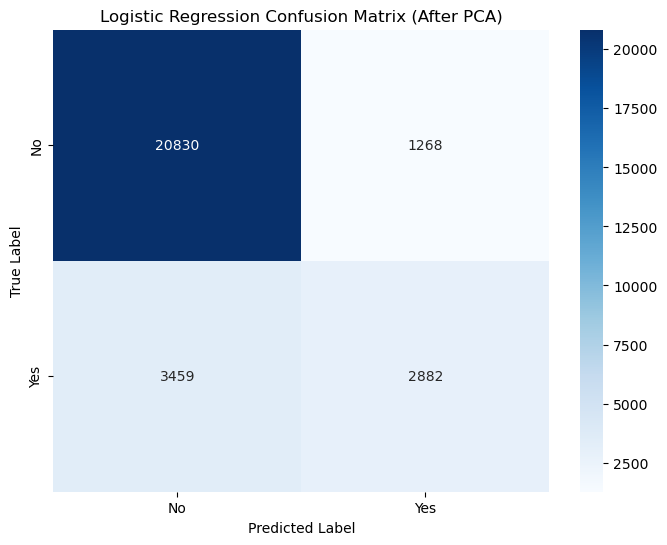

In [38]:
conf_matrix_logreg_pca = confusion_matrix(y_test, y_pred_logreg_pca)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Logistic Regression Confusion Matrix (After PCA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interprétation des cellules :  
- **Cellule [No, No] : 20830**  
Le modèle a correctement prédit 20830 exemples comme “No” (vrais négatifs).  
- **Cellule [No, Yes] : 1268**  
Le modèle a prédit “Yes”, mais la réalité était “No” pour 1268 exemples (faux positifs).  
- **Cellule [Yes, No] : 3459**  
Le modèle a prédit “No”, mais la réalité était “Yes” pour 3459 exemples (faux négatifs).  
- **Cellule [Yes, Yes] : 2882**  
Le modèle a correctement prédit 2882 exemples comme “Yes” (vrais positifs).  

### Observations :  
- **Précision globale** : Le modèle semble mieux prédire les cas négatifs (No) que les cas positifs (Yes).  
- **Faux négatifs élevés** : La cellule [Yes, No] montre que le modèle a des difficultés à détecter les cas positifs.  
- **Impact du PCA** : Après PCA, bien que le modèle conserve une bonne capacité à prédire les négatifs, il semble avoir réduit la performance sur les positifs.

    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#8A2BE2; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.2. DEcision Tree avec PCA

</h4>




In [40]:
# Initialize and train the model
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_dt_pca = dt.predict(X_test_pca)

print("Decision Tree Performance after PCA:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_pca))
print("Precision:", precision_score(y_test, y_pred_dt_pca))
print("Recall:", recall_score(y_test, y_pred_dt_pca))
print("F1 Score:", f1_score(y_test, y_pred_dt_pca))
print(classification_report(y_test, y_pred_dt_pca))
print(confusion_matrix(y_test, y_pred_dt_pca))


Decision Tree Performance after PCA:
Accuracy: 0.7729877984457962
Precision: 0.4912146676852559
Recall: 0.5070178205330389
F1 Score: 0.49899115318950793
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     22098
           1       0.49      0.51      0.50      6341

    accuracy                           0.77     28439
   macro avg       0.67      0.68      0.68     28439
weighted avg       0.78      0.77      0.77     28439

[[18768  3330]
 [ 3126  3215]]



Les performances de la arbre de décision après application de l'ACP montrent une **accuracy de 77,30 %**, indiquant une bonne capacité du modèle à classer correctement les données. Cependant, il existe un déséquilibre entre les classes :  

- La classe majoritaire (0) obtient des scores élevés en précision (86 %) et rappel (85 %), indiquant que le modèle gère bien cette classe.  
- La classe minoritaire (1) a des performances plus faibles, avec une précision de 49 % et un rappel de 51 %, ce qui signifie que le modèle a du mal à identifier correctement les exemples de cette classe.  

Le **score F1 pondéré** est de 85 %, mais le **score F1 de la classe 1** est seulement de 50 %, révélant un besoin d'amélioration pour équilibrer les performances entre les classes. 

    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.2.2.  la matrice de confusion pour la  DEcision Tree  après PCA 


</h4>




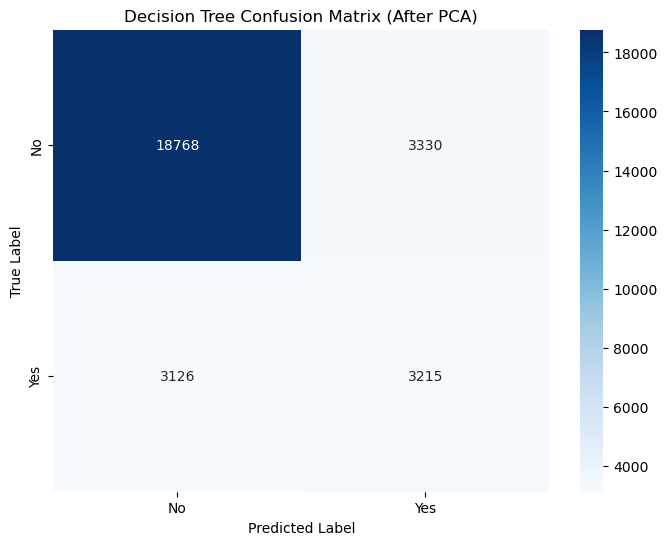

In [41]:
# Calculate confusion matrix for Decision Tree after PCA
conf_matrix_tree_pca = confusion_matrix(y_test, y_pred_dt_pca)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Decision Tree Confusion Matrix (After PCA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interprétation des cellules :  
- **Cellule [No, No] : 18768**  
Le modèle a correctement prédit 18768 exemples comme “No” (vrais négatifs).  
- **Cellule [No, Yes] : 3330**  
Le modèle a prédit “Yes”, mais la réalité était “No” pour 3330 exemples (faux positifs).  
- **Cellule [Yes, No] : 3126**  
Le modèle a prédit “No”, mais la réalité était “Yes” pour 3126 exemples (faux négatifs).  
- **Cellule [Yes, Yes] : 3215**  
Le modèle a correctement prédit 3215 exemples comme “Yes” (vrais positifs).  

### Observations :  
- **Précision globale** : Le modèle semble mieux prédire les cas négatifs (No) que les cas positifs (Yes).  
- **Faux négatifs élevés** : La cellule [Yes, No] montre que le modèle a des difficultés à détecter les cas positifs.  
- **Impact du PCA** : Après PCA, bien que le modèle conserve une bonne capacité à prédire les négatifs, il semble avoir réduit la performance sur les positifs.


    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#8A2BE2; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.3. Naive Bayes avec PCA

</h4>




In [43]:
# Initialize and train the model
nb = GaussianNB()
nb.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_nb_pca = nb.predict(X_test_pca)

print("Naive Bayes Performance after PCA:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_pca))
print("Precision:", precision_score(y_test, y_pred_nb_pca))
print("Recall:", recall_score(y_test, y_pred_nb_pca))
print("F1 Score:", f1_score(y_test, y_pred_nb_pca))
print(classification_report(y_test, y_pred_nb_pca))


Naive Bayes Performance after PCA:
Accuracy: 0.8213368965153487
Precision: 0.6656151419558359
Recall: 0.3993061031383063
F1 Score: 0.49916214884179394
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     22098
           1       0.67      0.40      0.50      6341

    accuracy                           0.82     28439
   macro avg       0.76      0.67      0.70     28439
weighted avg       0.81      0.82      0.80     28439




Les performances de la arbre de décision après application de l'ACP montrent une **accuracy de 82,13 %**, indiquant une bonne capacité du modèle à classer correctement les données. Cependant, il existe un déséquilibre entre les classes :  

- La classe majoritaire (0) obtient des scores élevés en précision (85 %) et rappel (94%), indiquant que le modèle gère bien cette classe.  
- La classe minoritaire (1) a des performances plus faibles, avec une précision de 67 % et un rappel de 40 %, ce qui signifie que le modèle a du mal à identifier correctement les exemples de cette classe.  

Le **score F1 pondéré** est de 89 %, mais le **score F1 de la classe 1** est seulement de 50 %, révélant un besoin d'amélioration pour équilibrer les performances entre les classes.

    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.3.2.  la matrice de confusion pour  Naive Bayes après PCA 


</h4>




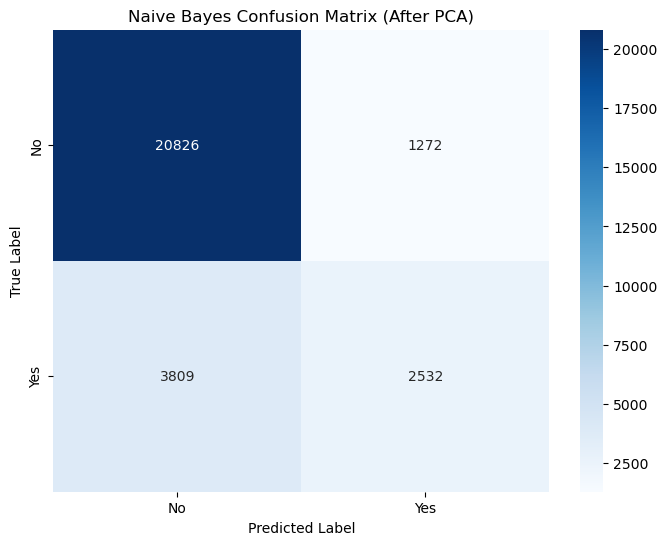

In [45]:
# Calculate confusion matrix for Naive Bayes after PCA
conf_matrix_nb_pca = confusion_matrix(y_test, y_pred_nb_pca)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Naive Bayes Confusion Matrix (After PCA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interprétation des cellules :  
- **Cellule [No, No] : 20826**  
Le modèle a correctement prédit 20826 exemples comme “No” (vrais négatifs).  
- **Cellule [No, Yes] : 1272**  
Le modèle a prédit “Yes”, mais la réalité était “No” pour 1272 exemples (faux positifs).  
- **Cellule [Yes, No] : 3809**  
Le modèle a prédit “No”, mais la réalité était “Yes” pour 3809 exemples (faux négatifs).  
- **Cellule [Yes, Yes] : 2532**  
Le modèle a correctement prédit 2532 exemples comme “Yes” (vrais positifs).  

### Observations :  
- **Précision globale** : Le modèle semble mieux prédire les cas négatifs (No) que les cas positifs (Yes).  
- **Faux négatifs élevés** : La cellule [Yes, No] montre que le modèle a des difficultés à détecter les cas positifs.  
- **Impact du PCA** : Après PCA, bien que le modèle conserve une bonne capacité à prédire les négatifs, il semble avoir réduit la performance sur les positifs.


    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#8A2BE2; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.4. Random Forest avec PCA

</h4>




In [46]:
# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_rf_pca = rf.predict(X_test_pca)

print("Random Forest Performance after PCA:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_pca))
print("Precision:", precision_score(y_test, y_pred_rf_pca))
print("Recall:", recall_score(y_test, y_pred_rf_pca))
print("F1 Score:", f1_score(y_test, y_pred_rf_pca))
print(classification_report(y_test, y_pred_rf_pca))
print(confusion_matrix(y_test, y_pred_rf_pca))

Random Forest Performance after PCA:
Accuracy: 0.8431379443721649
Precision: 0.7220122815304676
Recall: 0.4821006150449456
F1 Score: 0.5781560283687942
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22098
           1       0.72      0.48      0.58      6341

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439

[[20921  1177]
 [ 3284  3057]]



Les performances de la arbre de décision après application de l'ACP montrent une **accuracy de 84,31 %**, indiquant une bonne capacité du modèle à classer correctement les données. Cependant, il existe un déséquilibre entre les classes :  

- La classe majoritaire (0) obtient des scores élevés en précision (86 %) et rappel (95%), indiquant que le modèle gère bien cette classe.  
- La classe minoritaire (1) a des performances plus faibles, avec une précision de 72 % et un rappel de 48%, ce qui signifie que le modèle a du mal à identifier correctement les exemples de cette classe.  

Le **score F1 pondéré** est de 90 %, mais le **score F1 de la classe 1** est seulement de  58%, révélant un besoin d'amélioration pour équilibrer les performances entre les classes.

    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.4.2.  la matrice de confusion pour  Random Forest après PCA 


</h4>




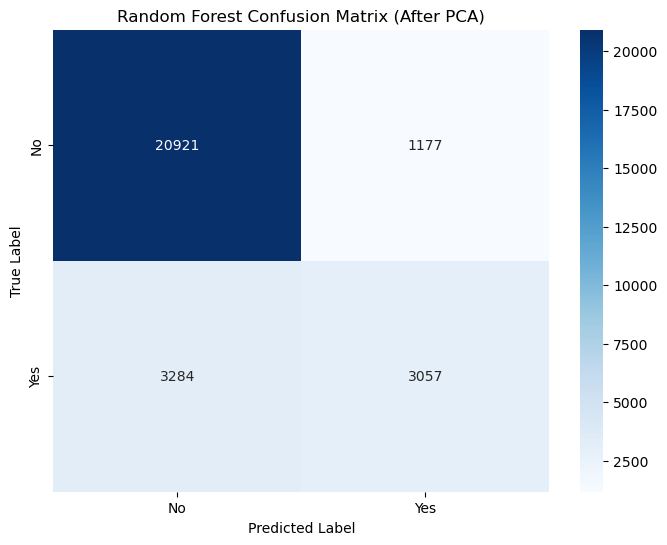

In [47]:
# Calculate confusion matrix for Random Forest after PCA
conf_matrix_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest Confusion Matrix (After PCA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interprétation des cellules :  
- **Cellule [No, No] : 20921**  
Le modèle a correctement prédit  20921exemples comme “No” (vrais négatifs).  
- **Cellule [No, Yes] : 1177**  
Le modèle a prédit “Yes”, mais la réalité était “No” pour 20921exemples (faux positifs).  
- **Cellule [Yes, No] : 3284**  
Le modèle a prédit “No”, mais la réalité était “Yes” pour 3284 exemples (faux négatifs).  
- **Cellule [Yes, Yes] : 3057**  
Le modèle a correctement prédit 3057 exemples comme “Yes” (vrais positifs).  

### Observations :  
- **Précision globale** : Le modèle semble mieux prédire les cas négatifs (No) que les cas positifs (Yes).  
- **Faux négatifs élevés** : La cellule [Yes, No] montre que le modèle a des difficultés à détecter les cas positifs.  
- **Impact du PCA** : Après PCA, bien que le modèle conserve une bonne capacité à prédire les négatifs, il semble avoir réduit la performance sur les positifs.


    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#8A2BE2; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.5. Cross-Validation 
</h4>




In [48]:
# Convert DataFrames to NumPy arrays
X_np = X.values
X_train_np = X_train.values
X_test_np = X_test.values

# Apply PCA to NumPy arrays
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_np)
X_test_pca = pca.transform(X_test_np)

# Transform the entire dataset for cross-validation
X_pca = pca.transform(X_np)

    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.5.2. cross-validation for Logistic Regression
</h4>




In [49]:
cv_scores_logreg = cross_val_score(LogisticRegression(max_iter=1000), X_pca, y, cv=5, scoring='accuracy')

print("Logistic Regression Cross-Validation Scores:")
print("Mean Accuracy:", cv_scores_logreg.mean())
print("Standard Deviation:", cv_scores_logreg.std())

Logistic Regression Cross-Validation Scores:
Mean Accuracy: 0.8344153052556346
Standard Deviation: 0.012053131823531625



La **validation croisée pour la régression logistique** montre une **précision moyenne de 83,44 %** sur les 5 plis, ce qui indique une bonne capacité de généralisation du modèle. La **déviation standard de 1,21 %** suggère que les résultats sont relativement stables et cohérents à travers les différentes itérations de validation croisée, avec peu de variance dans les performances du modèle.

Cela signifie que la régression logistique appliquée sur les données réduites avec PCA est efficace et robuste, avec une bonne stabilité dans ses performances.

    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.5.3. cross-validation for Decision Tree
</h4>




In [50]:
cv_scores_dt = cross_val_score(DecisionTreeClassifier(), X_pca, y, cv=5, scoring='accuracy')

print("Decision Tree Cross-Validation Scores:")
print("Mean Accuracy:", cv_scores_dt.mean())
print("Standard Deviation:", cv_scores_dt.std())

Decision Tree Cross-Validation Scores:
Mean Accuracy: 0.7435317573880175
Standard Deviation: 0.012898784611776742


**La validation croisée pour l'arbre de décision** montre une précision moyenne de 74,35 % sur les 5 plis. Cela indique que le modèle a des performances relativement bonnes, mais moins élevées que celles obtenues avec la régression logistique. La déviation standard de 1,29 % suggère une certaine stabilité dans les performances à travers les différents plis de validation croisée, avec une légère variabilité.

    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.5.4. cross-validation for  Naive Bayes
</h4>




In [51]:
cv_scores_nb = cross_val_score(GaussianNB(), X_pca, y, cv=5, scoring='accuracy')

print("Naive Bayes Cross-Validation Scores:")
print("Mean Accuracy:", cv_scores_nb.mean())
print("Standard Deviation:", cv_scores_nb.std())

Naive Bayes Cross-Validation Scores:
Mean Accuracy: 0.8218057234772586
Standard Deviation: 0.015413107864768995




La **validation croisée pour le classifieur Naive Bayes** montre une **précision moyenne de 82,18 %** sur les 5 plis. Cela indique que le modèle est globalement performant, avec une bonne capacité à classer les données correctement. La **déviation standard de 1,54 %** suggère une légère variation des performances entre les différents plis de validation croisée, mais elle reste relativement faible, ce qui montre une certaine stabilité du modèle.



    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.5.5. cross-validation for Random Forest
</h4>




In [52]:
cv_scores_rf = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_pca, y, cv=5, scoring='accuracy')

print("Random Forest Cross-Validation Scores:")
print("Mean Accuracy:", cv_scores_rf.mean())
print("Standard Deviation:", cv_scores_rf.std())

Random Forest Cross-Validation Scores:
Mean Accuracy: 0.830019853816518
Standard Deviation: 0.010628423527029881



La **validation croisée pour le classifieur Random Forest** montre une **précision moyenne de 83,00 %** sur les 5 plis, ce qui indique de bonnes performances globales du modèle. La **déviation standard de 1,06 %** suggère que les résultats sont très stables et cohérents entre les différentes itérations de validation croisée, avec peu de variabilité.



    
<h4 style="font-size:22px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
V.5.5.6. Conclusion de CROSS-Validation
</h4>





- **Meilleure précision** : La **régression logistique** et **Random Forest** sont les plus performants, avec des précisions moyennes de 83,44 % et 83,00 % respectivement.
- **Meilleure stabilité** : **Random Forest** présente la plus faible déviation standard, suivie de près par la régression logistique, ce qui en fait les modèles les plus stables.
- **Modèle moins performant** : **L'arbre de décision** est le moins performant avec une précision moyenne de 74,35 % et une déviation standard légèrement plus élevée, ce qui peut indiquer un surajustement possible sur les données.
- **Naive Bayes** : Bien que son score de précision soit compétitif (82,18 %), il est légèrement moins stable que les autres modèles.

En conclusion, la **régression logistique** et le **Random Forest** semblent être les meilleurs choix en termes de précision et de stabilité. Cependant, en fonction de la situation spécifique (par exemple, la complexité du modèle et le temps de calcul), l'une ou l'autre de ces méthodes peut être préférée.


<h4 style="font-size:30px; font-family:Garamond; font-weight:normal; color:#FF69B4; border-radius:5px 5px; padding:5px; text-transform:uppercase;">
IV.5.     Conclusion


</h4>

Dans cette analyse, plusieurs modèles de classification ont été appliqués au jeu de données après avoir effectué une Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité. Voici les résultats et les observations tirés à la fois des métriques de performance des modèles et de la validation croisée :

1. **Logistic Regression:**
   - **Performance After PCA:**
     - Accuracy: 0.833 
     - Precision: 0.69
     - Recall: 0.454
     - F1 Score: 0.549
   - **Cross-Validation:**
     - Mean Accuracy: 0.834
     - Standard Deviation: 0.012

   La régression logistique montre une précision solide mais un rappel relativement faible, ce qui indique qu'elle ne capte pas tous les cas positifs de manière efficace. Les résultats de la validation croisée sont cohérents avec cette performance, suggérant un comportement stable du modèle.

2. **Decision Tree:**
   - **Performance After PCA:**
     - Accuracy: 0.772
     - Precision: 0.491
     - Recall: 0.507
     - F1 Score: 0.500
   - **Cross-Validation:**
     - Mean Accuracy: 0.743
     - Standard Deviation: 0.012

 Le modèle d'arbre de décision présente une précision et une exactitude plus faibles par rapport aux autres, avec un rappel équilibré. La validation croisée indique que l'arbre de décision performe de manière cohérente mais de façon moins efficace par rapport aux autres modèles.

3. **Naive Bayes:**
   - **Performance After PCA:**
     - Accuracy: 0.821
     - Precision: 0.665
     - Recall: 0.399
     - F1 Score: 0.500
   - **Cross-Validation:**
     - Mean Accuracy: 0.821
     - Standard Deviation: 0.0154

   Naive Bayes obtient de bonnes performances en termes de précision mais présente un rappel plus faible, similaire à la régression logistique. Les résultats de la validation croisée sont cohérents, ce qui indique des performances fiables.

4. **Random Forest:**
   - **Performance After PCA:**
     - Accuracy: 0.843
     - Precision: 0.722
     - Recall: 0.4821
     - F1 Score: 0.578
   - **Cross-Validation:**
     - Mean Accuracy: 0.830
     - Standard Deviation: 0.0106

 Le modèle Random Forest présente la meilleure précision et exactitude, en faisant le modèle le plus efficace parmi ceux évalués. Son rappel est plus faible, mais les métriques de performance globales sont solides. La validation croisée confirme sa fiabilité avec une variance minimale.

### Résumé

- **Random Forest** est le modèle le plus performant en termes de précision, d'exactitude et de score F1 après l'ACP, et il donne également de bons résultats en validation croisée.
- **La régression logistique** et **Naive Bayes** montrent des performances comparables, avec une grande précision et exactitude mais un rappel plus faible.
- **L'arbre de décision** présente des performances globales inférieures par rapport aux autres modèles.

Compte tenu de ces résultats, **Random Forest** est recommandé pour cette tâche, bien que des ajustements supplémentaires et une prise en compte du déséquilibre dans la variable cible puissent être nécessaires pour améliorer le rappel et l'efficacité globale du modèle.